# Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns; sns.set_theme()
import itertools
import warnings
import os
from google.colab import drive
from google.colab import files
import missingno as mn

%matplotlib inline
warnings.filterwarnings('ignore')

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

drive.mount('/content/drive/')

Mounted at /content/drive/


# Dataset Preprocessing and Manipulation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Project/Dataset/application_data.csv').drop_duplicates()
df_copy = df
df_desc = pd.read_csv("/content/drive/MyDrive/Data Science Project/Dataset/columns_description.csv").drop_duplicates()

In [ ]:
df_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


From the above description of the columns, we notice that column 96 - 115 are document submission flags. For the scope and complexity of this analysis, we will ignore these fields.

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Null Value Calculation

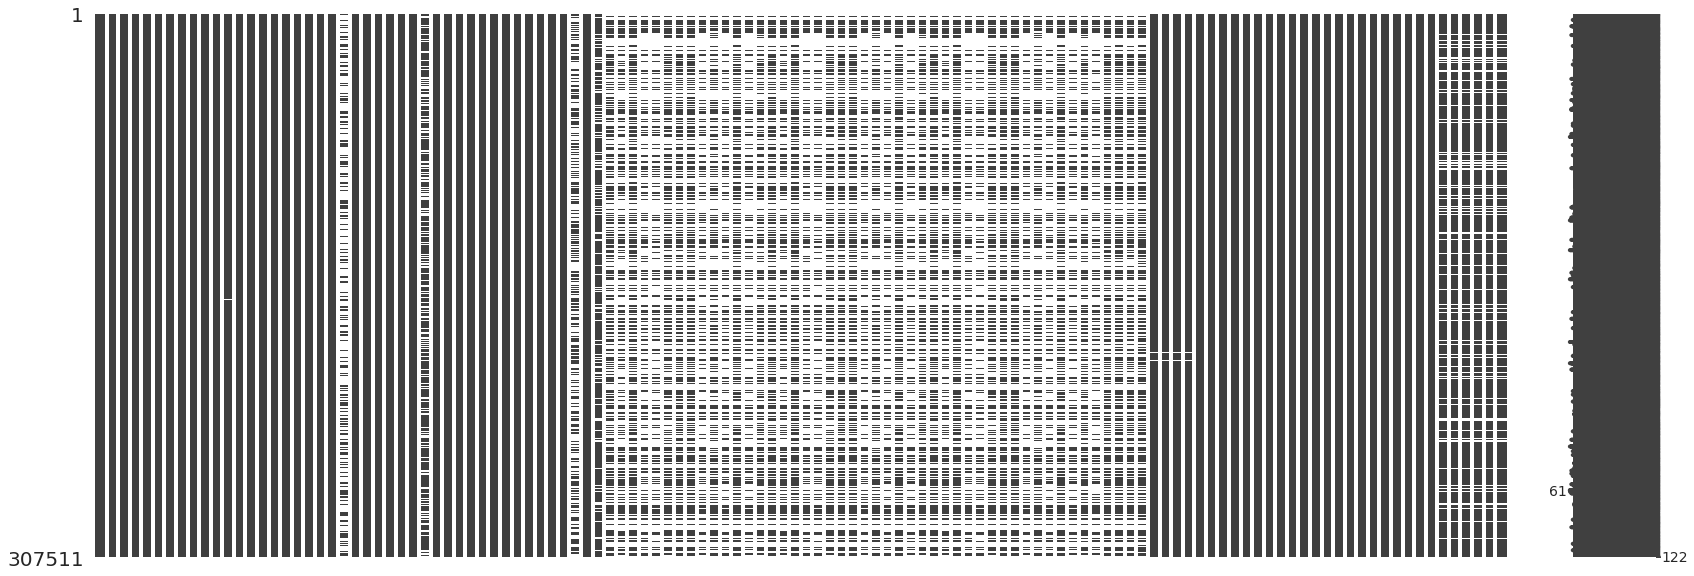

In [ ]:
mn.matrix(df)

This tells us, alot of values in the dataset are missing which needs to be cleaned up before analysing.

 - lets count the number of null values in each columns

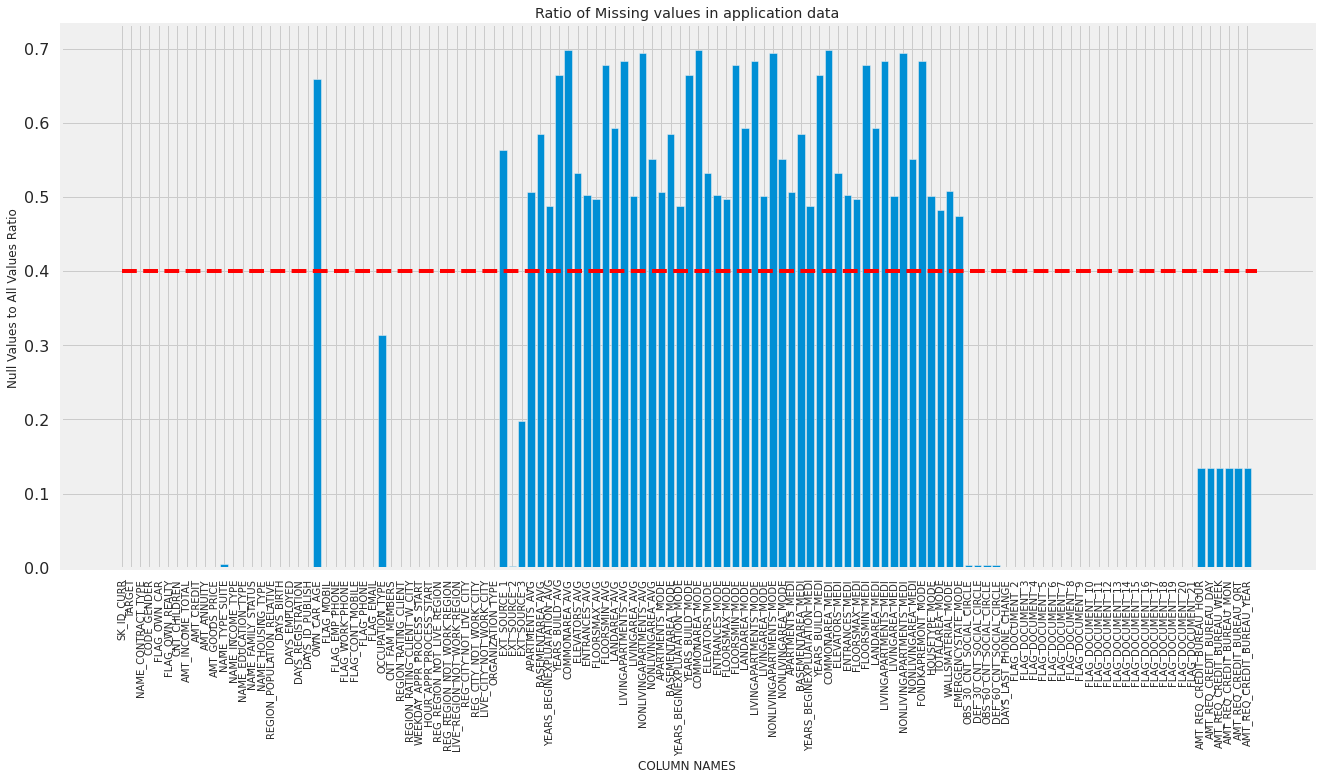

In [ ]:
null_df = pd.DataFrame((df.isnull().sum())/df.shape[0]).reset_index()
null_df.columns = ['Column Name', 'Null Values Ratio']

fig = plt.figure(figsize=(20,10))
plt.bar( null_df['Column Name'], null_df['Null Values Ratio'] )
plt.xticks(rotation =90,fontsize =10)
plt.hlines(y=0.4,xmin=0,xmax=122,color='red',linestyles='--')
plt.title("Ratio of Missing values in application data")
plt.ylabel("Null Values to All Values Ratio ")
plt.xlabel("COLUMN NAMES")
plt.show()


Lets check the columns that have missing values over 40%

In [ ]:
nullcol_40_application = null_df[null_df["Null Values Ratio"]>=0.4]
nullcol_40_application

,Column Name,Null Values Ratio
21,OWN_CAR_AGE,0.659908
41,EXT_SOURCE_1,0.563811
44,APARTMENTS_AVG,0.507497
45,BASEMENTAREA_AVG,0.585160
46,YEARS_BEGINEXPLUATATION_AVG,0.487810
47,YEARS_BUILD_AVG,0.664978
48,COMMONAREA_AVG,0.698723
49,ELEVATORS_AVG,0.532960
50,ENTRANCES_AVG,0.503488
51,FLOORSMAX_AVG,0.497608


In [ ]:
len(nullcol_40_application)

49

 - We notice that total of 49 columns have more than 40% of values missing. 
 - These features also appear to be related to some form of area owned by the customer. (house/ land/ basement) 
 - For the sake of simplicity, we will remove these columns.



In [ ]:
unwanted_features = nullcol_40_application['Column Name'].tolist()

 - There are 19 document related attribute. These tell if a certain document was turned in for processing.
 - We will access how important each of these document features are and how well it correlates to someone being a defaulter.
 - Baseed on this analysis we will extend our unwanted_features list. 


## Correlations

### Docment submission and Loan Defaulting

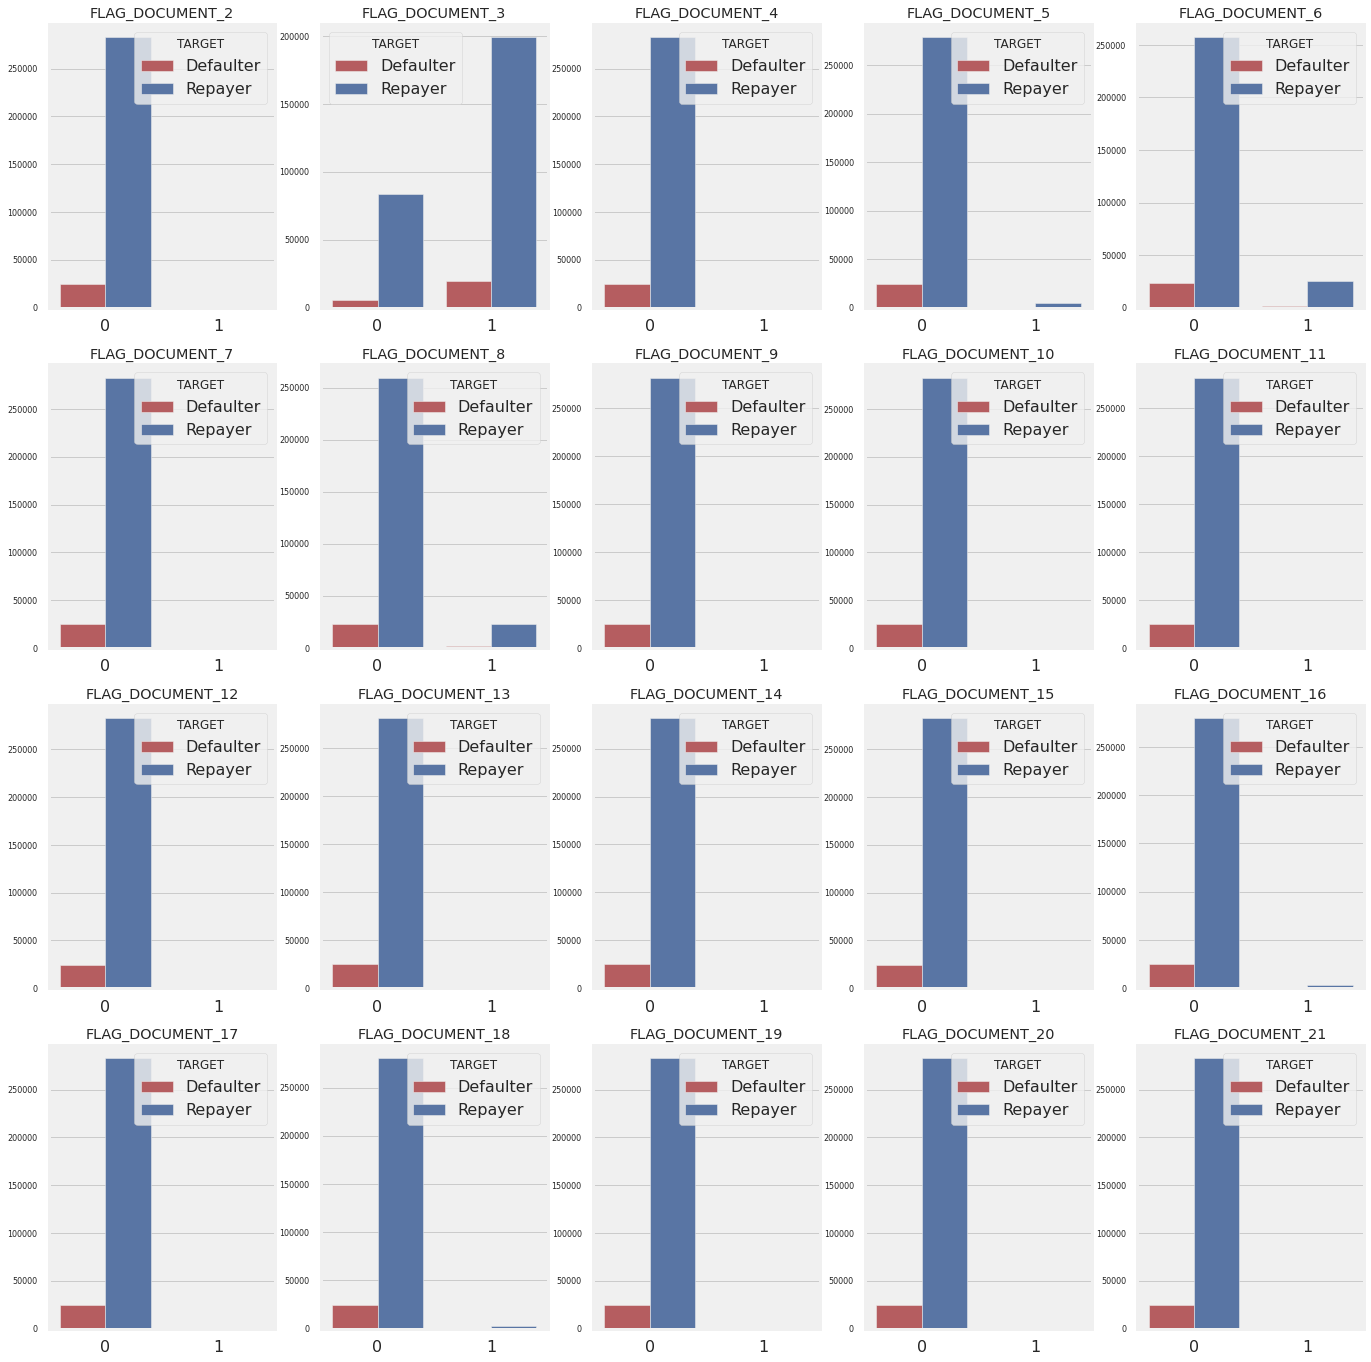

In [ ]:
doc_list = list(df.filter(regex='FLAG_DOCUMENT'))
flag_df = df[doc_list+['TARGET']]
flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))
for i,j in itertools.zip_longest(doc_list,range(len(doc_list))):
    plt.subplot(4,5,j+1)
    ax = sns.countplot(flag_df[i],hue=flag_df["TARGET"],palette=["r","b"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

 - From the above graphs, we notice even with large number of ducments not being submitted, the number of defaulters doesnt change as much.
 -  However, FLAG_DOCUMENT_3 shows that people who submitted this document are less likely to default.

In [ ]:
doc_list.remove('FLAG_DOCUMENT_3')
unwanted_features = unwanted_features + doc_list

In [ ]:
len(unwanted_features)

68

### General information and Defaulting

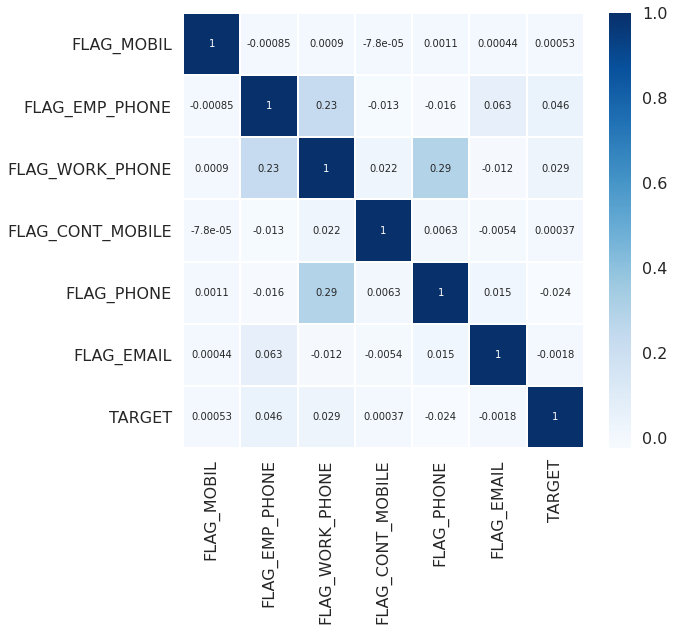

In [ ]:
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = df[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="Blues",
            linewidth=1)

- From the above heat map, we observe that the here is no correlation between mobil_phone, email ets with loan repayment.
- Therefore we will remove these columns.

In [ ]:
contact_col.remove('TARGET') 
unwanted_features = unwanted_features + contact_col
len(unwanted_features)

74

In [ ]:
df.drop(labels=unwanted_features,axis=1,inplace=True)
df.shape

(307511, 48)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.710023,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.453752,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,-757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,-274.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,0.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Standarize Values

In [ ]:
# Converting Negative days to positive days

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    df[col] = abs(df[col])

In [ ]:
# Binning Numerical Columns to create a categorical column

# Creating brackets for income amount
df['AMT_INCOME_TOTAL']=df['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [ ]:
df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

- More than 50% of the loans have income amount in the range of 100k - 200k.
- Almost 92% of applicants have income less than 300k.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1034e9e1d0>,
      dtype=object)

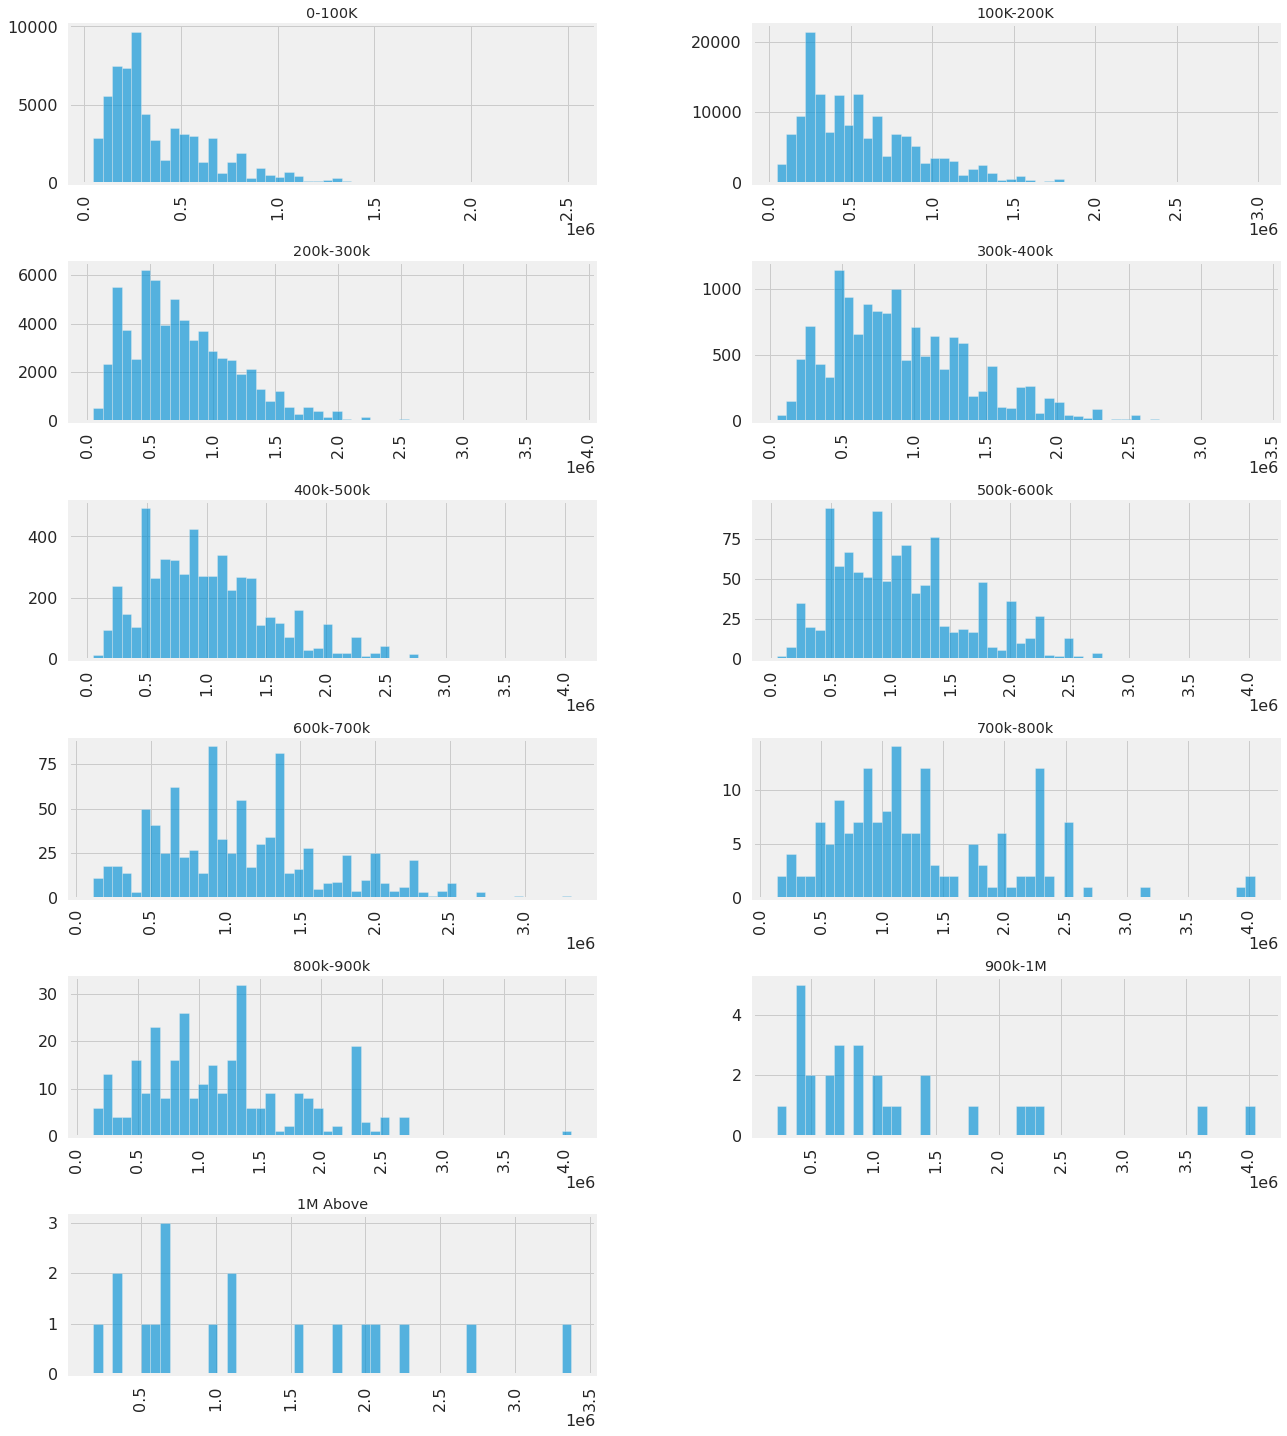

In [ ]:
df[['AMT_INCOME_RANGE','AMT_CREDIT']].hist(by=['AMT_INCOME_RANGE'], figsize=(21,25), bins=50, layout=(6,2), alpha = 0.65 )

- above graph shows the loan amount requested be each income group

In [ ]:
# Creating brackets for Age
df['AGE'] = df['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

df['AGE_GROUP']=pd.cut(df['AGE'],bins=bins,labels=slots)


In [ ]:
df['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

- More than 55% of loan applicants have age over 40 yrs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1034fe8eb8>,
      dtype=object)

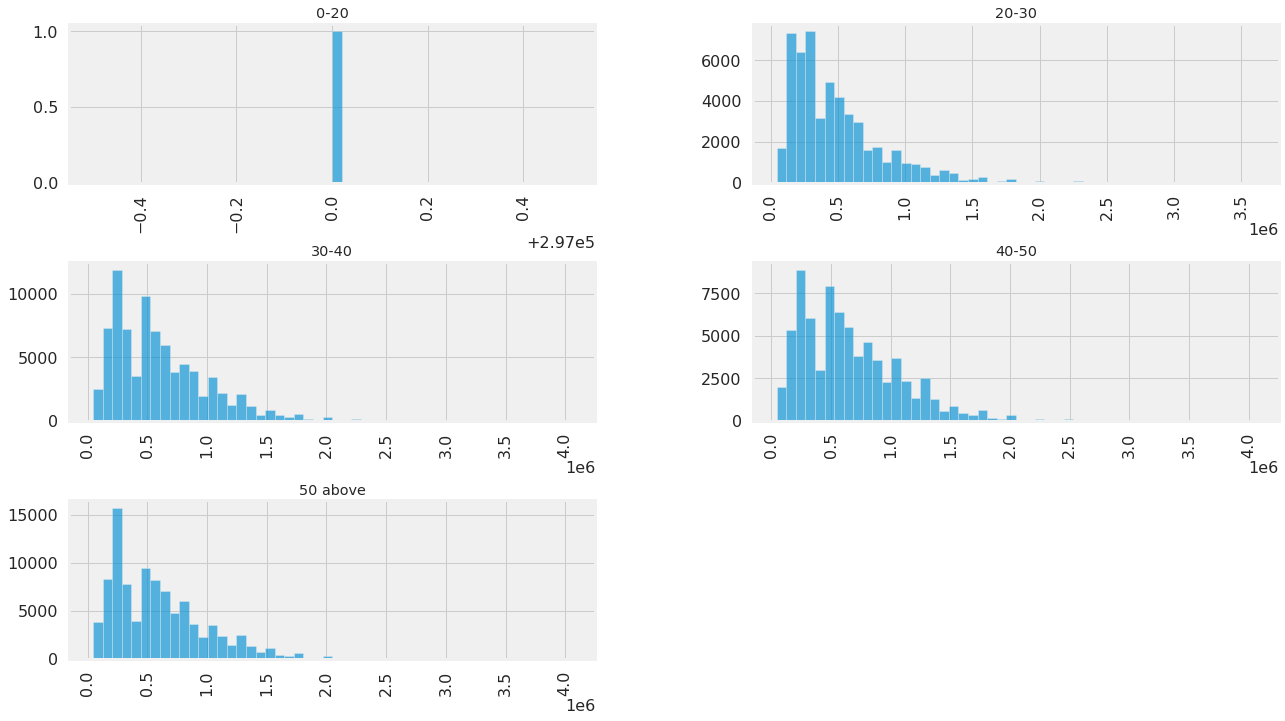

In [ ]:
df[['AGE_GROUP','AMT_CREDIT']].hist(by=['AGE_GROUP'], figsize=(21,25), bins=50, layout=(6,2), alpha = 0.65 )

In [ ]:
# Creating brackets for Employement Time
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

df['EMPLOYMENT_YEAR']=pd.cut(df['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [ ]:
df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
60 above     0.000000
50-60        0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

More than 55% of the applicants have work experience within 0-5 years.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1032501d68>,
      dtype=object)

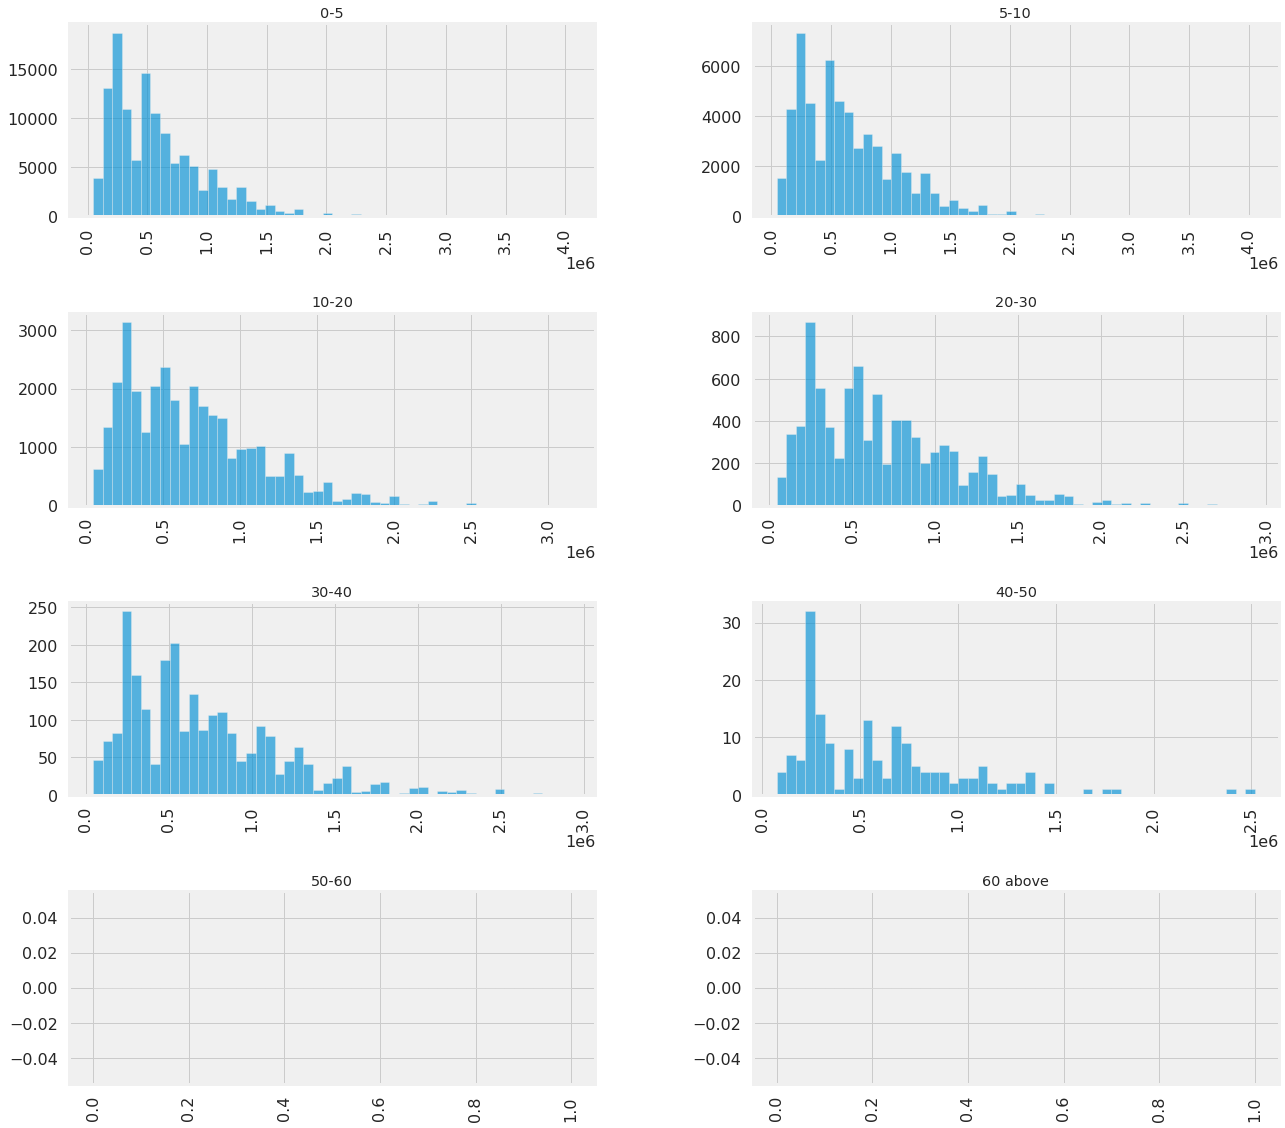

In [ ]:
df[['EMPLOYMENT_YEAR','AMT_CREDIT']].hist(by=['EMPLOYMENT_YEAR'], figsize=(21,25), bins=50, layout=(5,2), alpha = 0.65 )

## Data type conversion

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

Converting Object and Numerical columns to Categorical columns

In [ ]:
categ_col = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categ_col:
    df[col] =pd.Categorical(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

## Null Value Data Inputation

Checking the % of null value for each column in application dataframe

In [ ]:
round(df.isnull().sum() / df.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

Categorical variable name NAME_TYPE_SUITE has lower null percentage, 0.42% with the most frequent category using mode()[0] 

In [ ]:
df['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
df['NAME_TYPE_SUITE'].fillna((df['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

Ctegorical variable name OCCUPATION_TYPE has higher null percentage, 31.35%

In [ ]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].cat.add_categories('Unknown')
df['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)

In [ ]:
df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    df[col].fillna(df[col].median(),inplace = True)

## Identifying Outliers


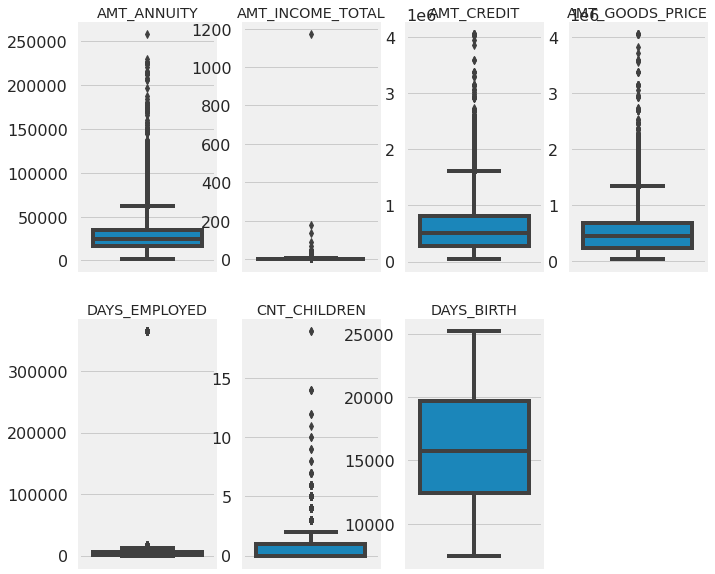

In [ ]:
plt.figure(figsize = (10,10))

outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y = df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [ ]:
df[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,307511.000000,3.075110e+05,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979,5.990260e+05,5.383962e+05,16036.995067,0.417052,67724.742149
std,14493.737315,2.371231,4.024908e+05,3.694465e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,4.500000e+04,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000e+05,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310e+05,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500e+05,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,4.050000e+06,4.050000e+06,25229.000000,19.000000,365243.000000


In [ ]:
df_copy_cluster = df.copy()

# Data Analysis

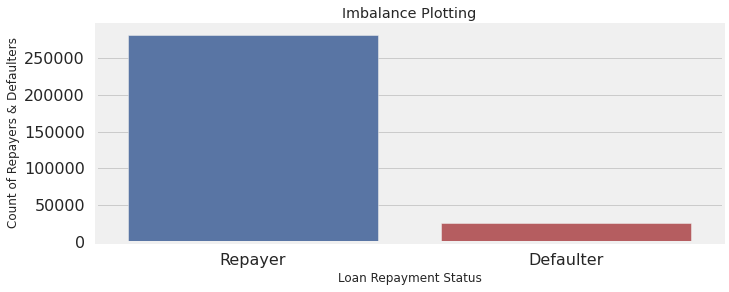

In [ ]:
Imbalance = df["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['b','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [ ]:
count0 = Imbalance.iloc[0]["TARGET"]
count1 = Imbalance.iloc[1]["TARGET"]
count0_percentage = round(count0/(count0 + count1) * 100,2)
count1_percentage = round(count1/(count0 + count1) * 100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count0_percentage,count1_percentage))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count0/count1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93 and 8.07
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39 : 1 (approx)


## Plotting Functions

In [ ]:
# We are creating 2 subplots by using this function : 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within the column

def univariate_categorical(feature, ylog=False, label_rotation=False, horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    perc_category = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    perc_category["TARGET"] = perc_category["TARGET"]*100
    perc_category.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data = df,
                    hue ="TARGET",
                    order = perc_category[feature],
                    palette=['r','b'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 13, 'fontweight' : 5, 'color' : 'Green'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    #Use the log scale in case the plot is not readable
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 13, 'fontweight' : 5, 'color' : 'Green'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=perc_category[feature], 
                    data=perc_category,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 17, 'fontweight' : 8, 'color' : 'Green'}) 

    plt.show();

In [ ]:
#function to plot repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 13, 'fontweight' : 5, 'color' : 'Green'})    
    plt.ylabel(y,fontdict={'fontsize' : 13, 'fontweight' : 5, 'color' : 'Green'})    
    plt.title(col, fontdict={'fontsize' : 17, 'fontweight' : 8, 'color' : 'Green'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [ ]:
# function to plot repetitive rel plots in bivariate numerical analysis on df

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=df, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [ ]:
#function to repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 13, 'fontweight' : 5, 'color' : 'Green'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 13, 'fontweight' : 5, 'color' : 'Green'})       

    plt.title(col , fontdict={'fontsize' : 17, 'fontweight' : 8, 'color' : 'Green'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [ ]:
#Function for plotting the point plots on merged df
def merged_pointplot(x,y):
    plt.figure(figsize=(10,6))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['g','r'])

##Categorical Variables Analysis

###Univariate

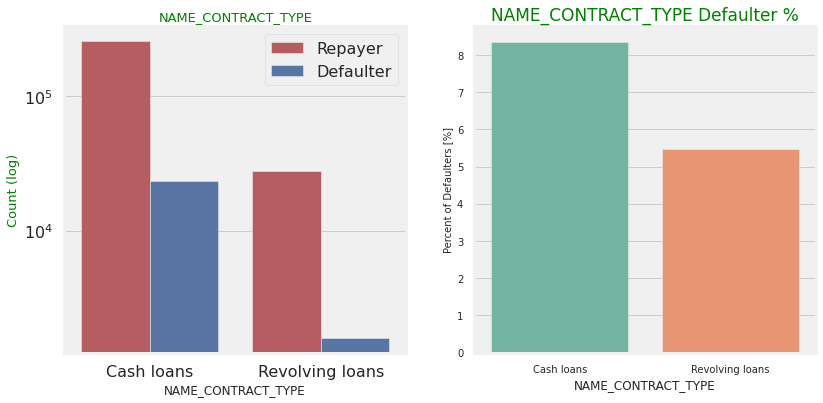

In [ ]:
#Analyzing the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

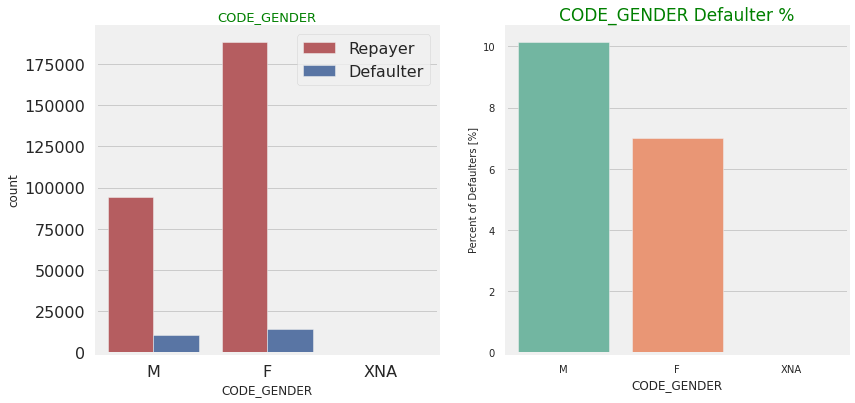

In [ ]:
#Analyzing the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

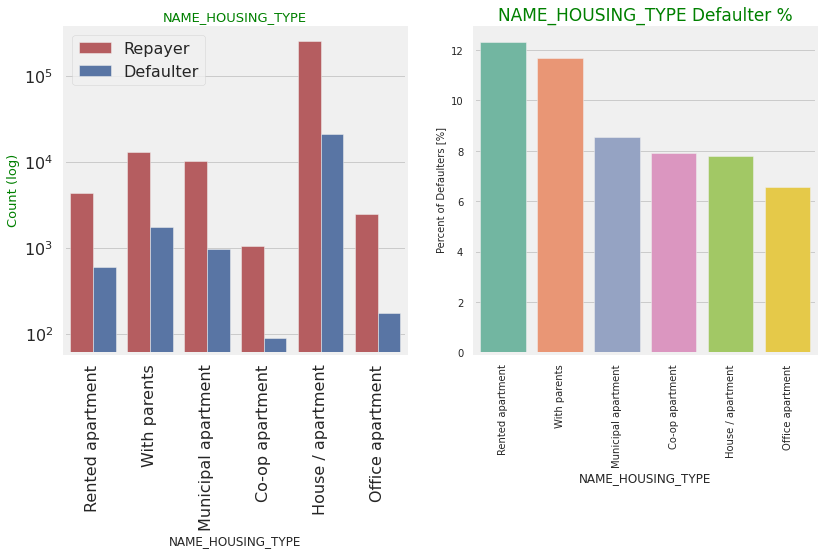

In [ ]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

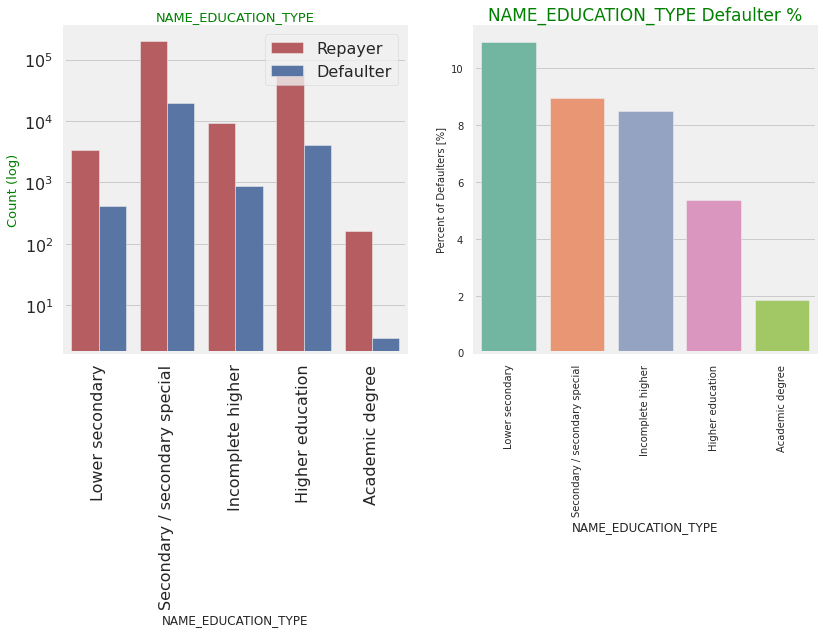

In [ ]:
#Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

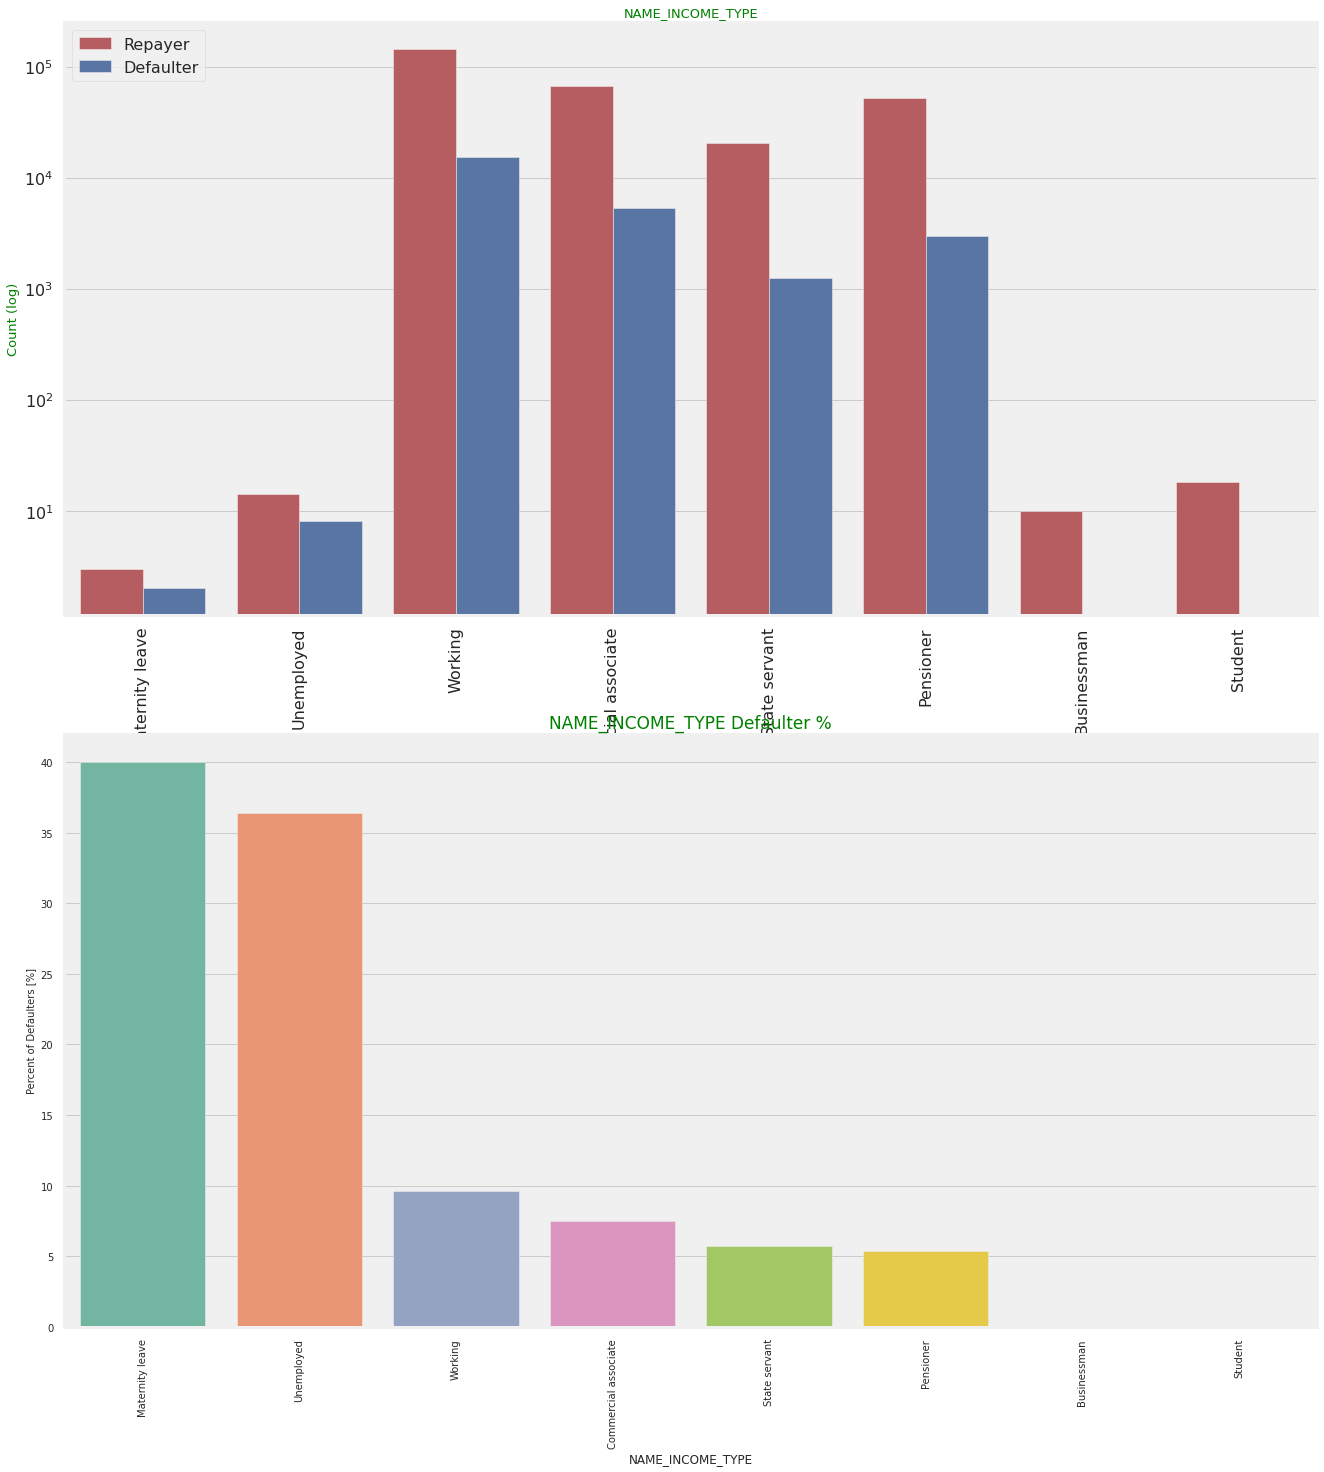

In [ ]:
#Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

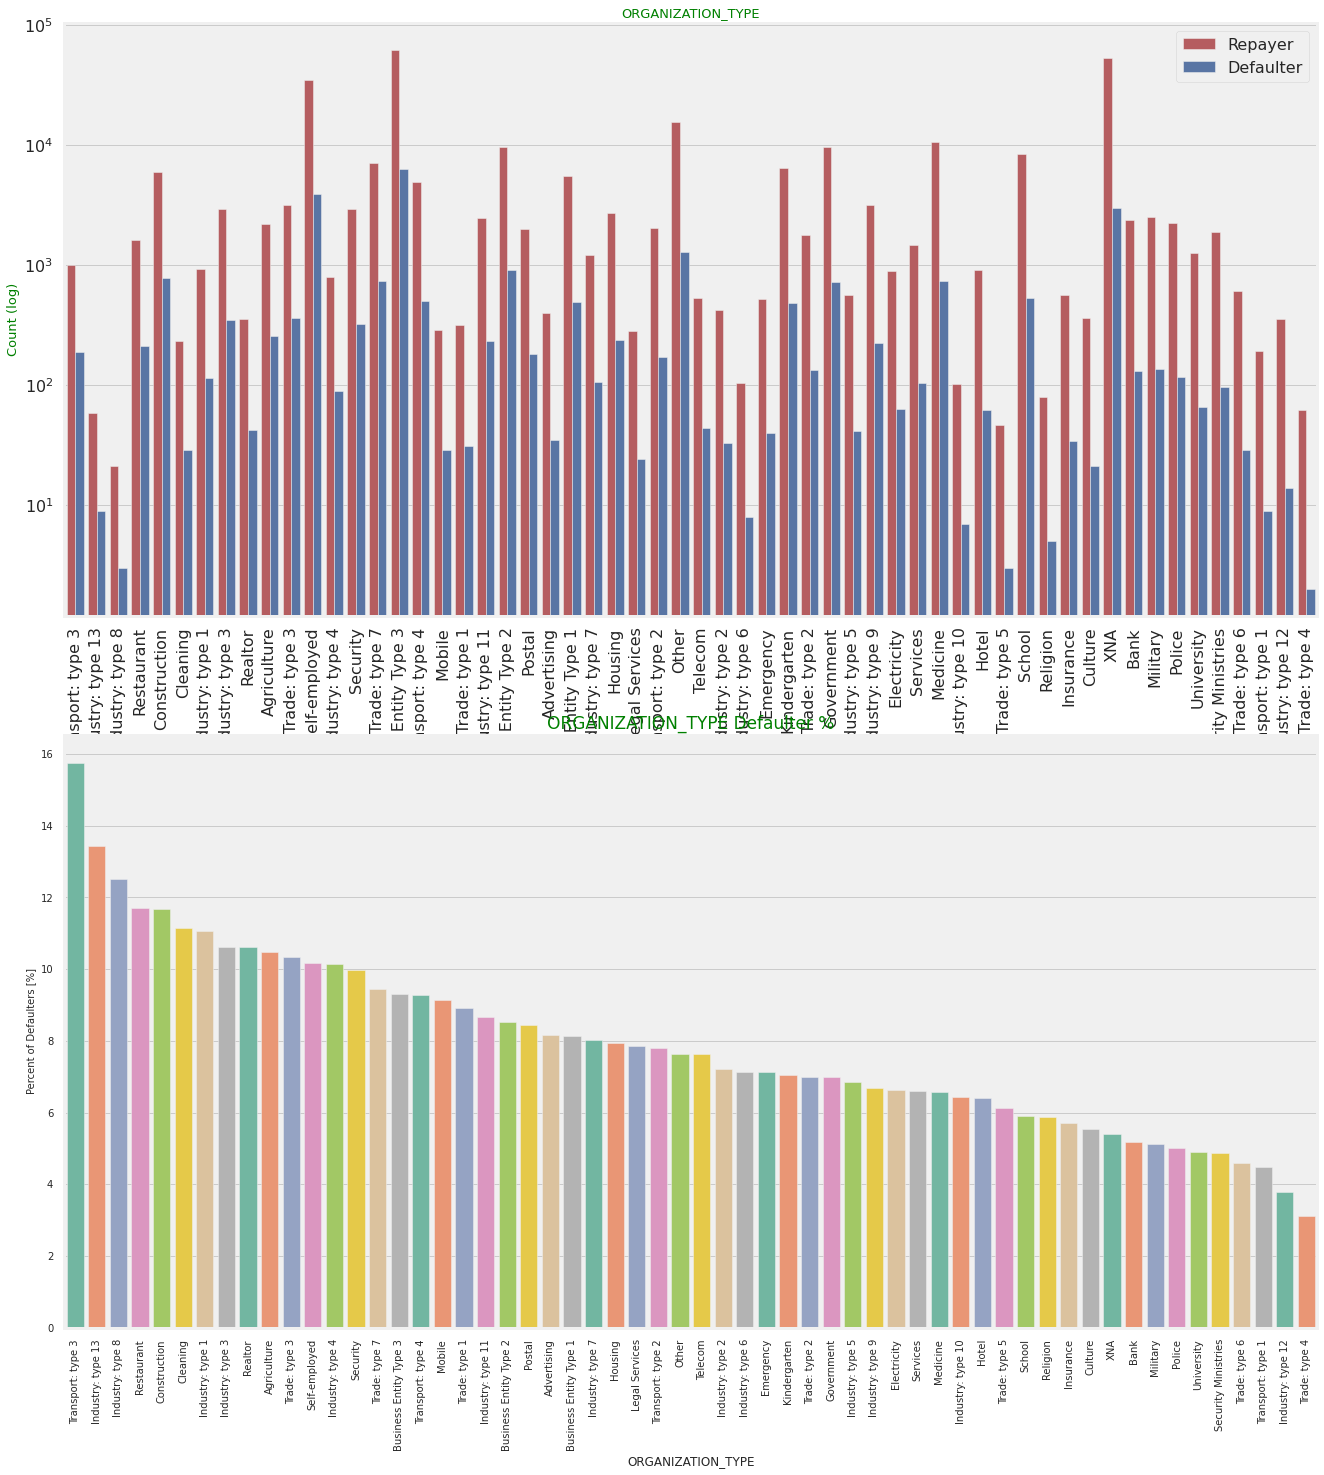

In [ ]:

univariate_categorical("ORGANIZATION_TYPE",True,True,False)

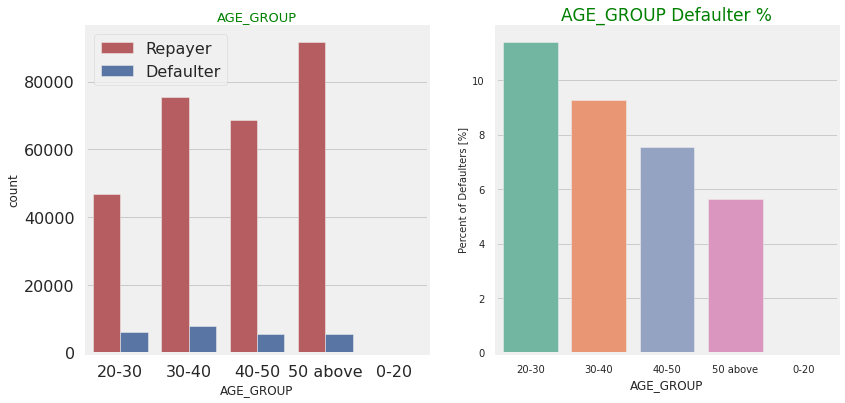

In [ ]:
univariate_categorical("AGE_GROUP",False,False,True)

### Multivariate / Bivariate

In [ ]:
df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


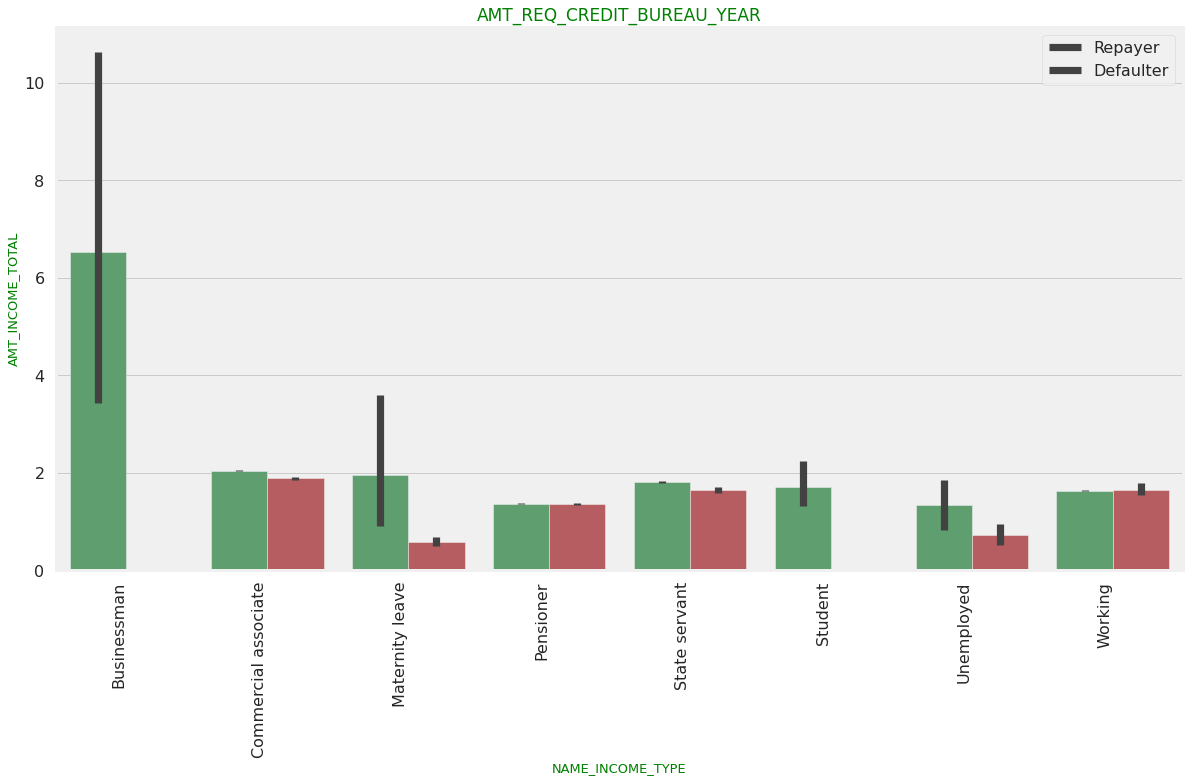

In [ ]:

bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",df,"TARGET",(18,10))

### Numerical Univariate Analysis

In [ ]:
columns_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

#Repayers
Repayer_df = df.loc[df['TARGET']==0, columns_for_correlation] 
#Defaulters
Defaulter_df = df.loc[df['TARGET']==1, columns_for_correlation] 

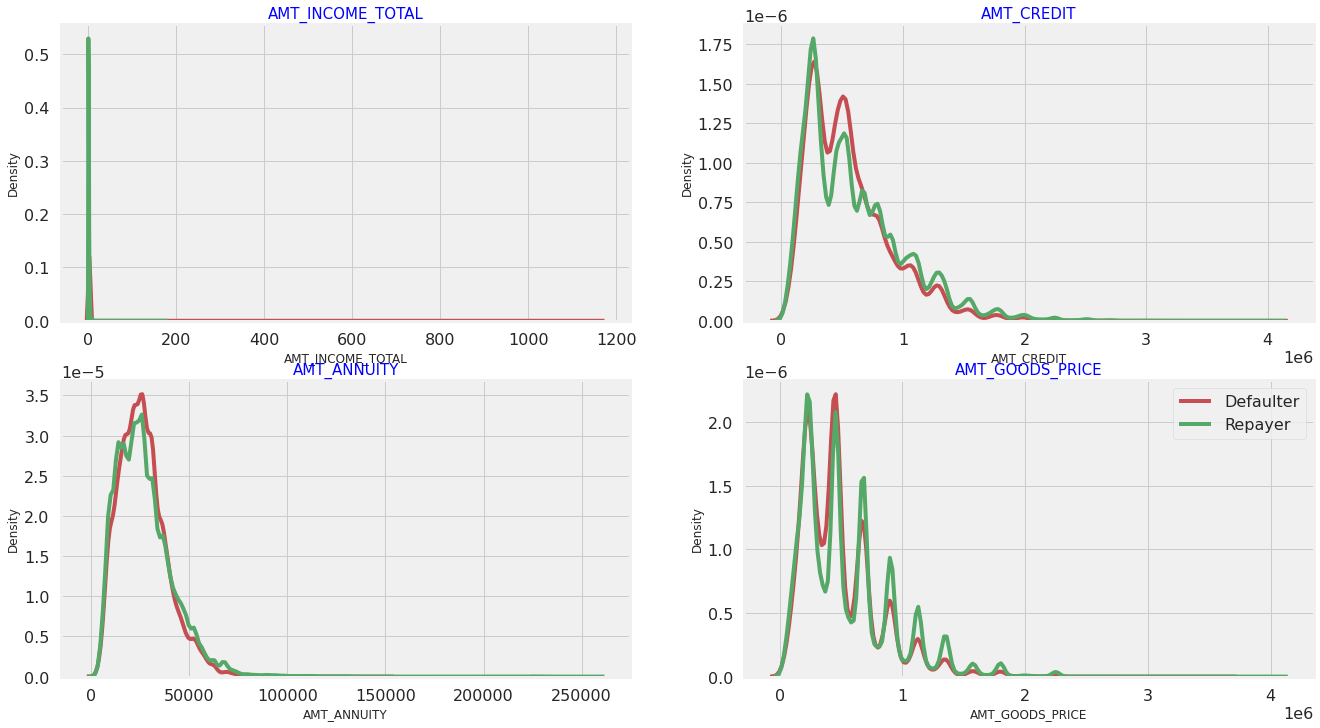

In [ ]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(20,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

<Figure size 1080x288 with 0 Axes>

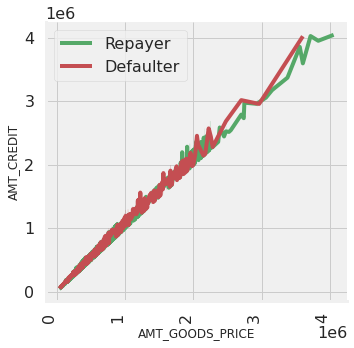

In [ ]:
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',df,"TARGET", "line", ['b','r'], False,(15,4))

<Figure size 1152x864 with 0 Axes>

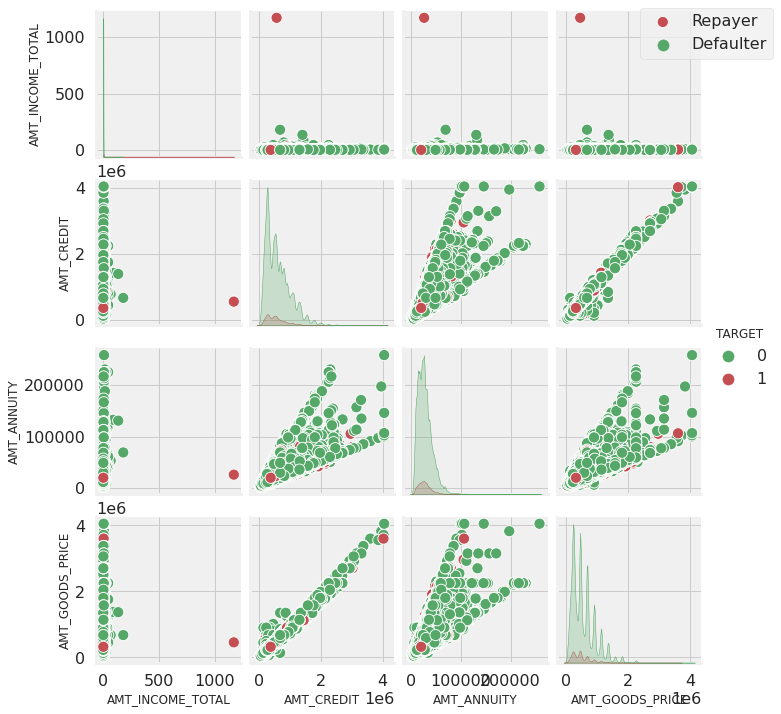

In [ ]:
amount = df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
fig = plt.figure(figsize=(16,12))
ax = sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

# Dimensionality Analysis

## PCA - Principal Component Analysis

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

 - For this section, we have picked 20 numerical features to reduce the dimentionality of our problem.
 - We will be reducing 20 features to 9 PCA features.

In [ ]:
df_copy['FLAG_OWN_CAR'] = df_copy['FLAG_OWN_CAR'].apply(lambda x: 0.0 if x=='N' else 1.0).astype(float)
df_copy['FLAG_OWN_REALTY'] = df_copy['FLAG_OWN_REALTY'].apply(lambda x: 0.0 if x=='N' else 1.0).astype(float)

In [ ]:
df_principle = df_copy[["FLAG_OWN_REALTY","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE", 
                        "DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH", "HOUR_APPR_PROCESS_START", "EXT_SOURCE_2", "EXT_SOURCE_3", 
                        "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE"]]
#df_principle = df_principle.drop_duplicates()
df_principle = df_principle.dropna()
df_principle.head()


,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,1.0,2.025,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,10,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0
2,1.0,0.675,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,9,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0
5,1.0,0.990,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,477,16,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0
6,1.0,1.710,1560726.0,41301.0,1395000.0,0.035792,13778,3130,1213.0,619,16,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0
7,1.0,3.600,1530000.0,42075.0,1530000.0,0.003122,18850,449,4597.0,2379,16,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0


In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca_set = PCA(n_components = 9)

In [ ]:
noromalised_df = (df_principle-df_principle.mean(axis=0))/df_principle.std(axis=0)
noromalised_df

,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,0.670331,0.118946,-0.499802,-0.174756,-0.527763,-0.142682,-1.552060,-0.481221,-0.380300,-0.625368,-0.649600,-1.351238,-1.905790,0.232879,4.141662,0.241910,5.235174,-0.166701
2,0.670331,-0.406202,-1.170413,-1.427812,-1.109047,-0.783742,0.677780,-0.484179,-0.206443,-0.349409,-0.958085,0.197991,1.123106,-0.592506,-0.322186,-0.590698,-0.276354,0.215933
5,0.670331,-0.283667,-0.292646,0.021888,-0.249232,1.099449,0.188076,-0.474394,-0.004747,-1.728532,1.201312,-0.868558,0.567097,-0.592506,-0.322186,-0.590698,-0.276354,-1.848369
6,0.670331,-0.003589,2.349898,0.984062,2.281774,1.099449,-0.547760,-0.463324,-1.072034,-1.633189,1.201312,1.086861,-0.095792,-0.179814,-0.322186,-0.174394,-0.276354,-0.680078
7,0.670331,0.731619,2.274031,1.038092,2.645077,-1.288899,0.632182,-0.482571,-0.110708,-0.451466,1.201312,1.035457,0.153597,0.232879,-0.322186,0.241910,-0.276354,-0.089934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,0.670331,-0.231153,-0.650635,-0.658513,-0.806295,0.149666,-0.991634,-0.482930,-1.224868,0.593955,-0.341115,-0.091223,0.505765,3.121728,6.373587,3.156037,5.235174,-1.583285
307505,0.670331,-0.231153,-0.948190,-0.359778,-0.866845,0.149666,1.919604,2.136197,0.676760,-0.466238,0.892827,-0.909982,1.187847,-0.592506,-0.322186,-0.590698,-0.276354,1.193507
307508,0.670331,-0.073608,0.169498,0.193716,0.101961,-1.151461,-0.271385,-0.428931,0.497222,1.409075,-0.958085,0.091222,-1.497876,1.883650,-0.322186,1.907125,-0.276354,-1.096296
307509,0.670331,-0.003589,-0.589902,-0.488570,-0.612534,-1.128725,-0.970464,-0.451436,-0.688810,-1.423701,-0.958085,-0.022785,0.771338,-0.592506,-0.322186,-0.590698,-0.276354,0.807275


In [ ]:
principalComponents_set = pca_set.fit_transform(noromalised_df)
principal_Df = pd.DataFrame(data = principalComponents_set
             , columns = ['v1', 'v2','v3','v4','v5','v6','v7','v8','v9'])
principal_Df

,v1,v2,v3,v4,v5,v6,v7,v8,v9
0,-1.895700,4.457413,2.103340,-1.879712,-4.484164,-0.105824,0.742564,0.344503,0.670977
1,-2.001362,-1.321558,-0.321445,-0.352060,0.082063,-0.911146,1.084486,-0.425861,-0.262290
2,0.136676,-0.886288,0.474217,1.183358,-0.486058,-0.109156,0.957782,-0.985625,0.889560
3,3.673009,0.221498,1.140287,0.927868,-0.138910,0.334229,0.901043,-1.092947,-0.158074
4,3.522855,0.610448,-0.166698,-0.201191,0.579510,-0.048637,0.253917,-0.244889,0.203940
...,...,...,...,...,...,...,...,...,...
245143,-2.698168,8.454749,0.634044,0.215423,-2.972738,-2.050220,1.093292,0.455591,-0.844446
245144,-1.403673,-1.213668,-2.356054,-0.542418,-0.269358,1.637634,-0.138215,-0.790173,-0.502884
245145,-0.214756,1.774183,-0.167813,-0.169290,2.223173,-0.746644,0.227896,0.840828,0.967719
245146,-0.967904,-1.097680,1.350909,-1.082188,0.206051,-0.542953,1.217733,-0.514846,-0.184034


 - With 9 PCA components, we managed to capture about 80% of information from 20 features.

In [ ]:
print(np.cumsum(pca_set.explained_variance_ratio_))

[0.15805585 0.29792578 0.41352815 0.48838256 0.56291713 0.62157415
 0.67937997 0.73255569 0.78244364]


[-0.04108522  0.15135888  0.55413109  0.51345624  0.55609974  0.12353655
 -0.00637056 -0.09057887 -0.01830072 -0.01210924  0.08290413  0.15125301
  0.03787154 -0.08519506 -0.09989878 -0.08522809 -0.09649489 -0.0804436 ]
[ 1.01508991e-02  1.90419849e-02  1.09739275e-01  9.57960759e-02
  1.09570860e-01  2.16160087e-02 -9.52535912e-03 -1.10775978e-02
 -1.63995800e-02  6.07747073e-04  4.60148712e-03  1.64100405e-04
 -1.58618142e-02  5.21310359e-01  4.75362938e-01  5.22082088e-01
  4.40830256e-01 -2.12308038e-02]
[-1.17923964e-01  4.80211938e-02 -3.91469095e-02  4.16791170e-03
 -3.94920275e-02 -4.16368990e-02 -5.86850159e-01 -5.29370421e-01
 -3.54198563e-01 -3.40445348e-01  9.55509008e-02 -1.16165741e-01
 -2.77798731e-01 -1.10588909e-02  5.24233937e-04 -1.12309976e-02
  2.98255094e-03  1.13599285e-01]
[-0.1353556   0.05129171 -0.1546911  -0.1244236  -0.14607004  0.44246452
 -0.06794167 -0.1432576   0.10649724  0.02371131  0.47699214  0.53730623
  0.08158954  0.11332978 -0.09162947  0.113421

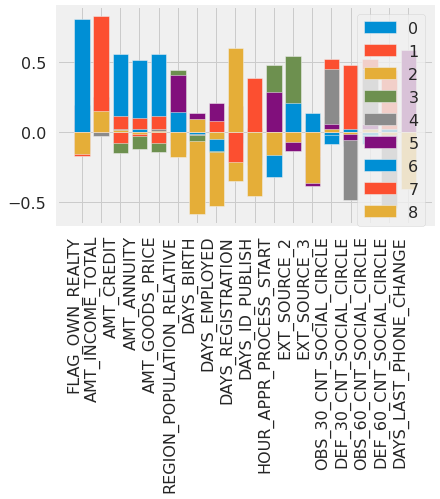

In [ ]:

comp = pca_set.components_
comp.shape
weight_df = pd.DataFrame(comp)
for i in range(len(comp)):
  print(comp[i])
  x = np.arange(len(comp[i]))
  plt.bar(x,comp[i])
  plt.xticks(x, ["FLAG_OWN_REALTY","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE", 
                        "DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH", "HOUR_APPR_PROCESS_START", "EXT_SOURCE_2", "EXT_SOURCE_3", 
                        "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE"])
  plt.xticks(rotation=90, ha='right')
  plt.legend(range(len(comp)))

In [ ]:
weight_df
weight_df.sum(axis=0)


0     0.431653
1     1.686711
2     0.353137
3     0.476583
4     0.352596
5     0.690862
6    -0.488518
7    -0.695006
8     0.150571
9    -0.810294
10    0.208365
11    0.416273
12   -0.900250
13    1.043516
14   -0.268298
15    1.042455
16   -0.383788
17   -0.438445
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

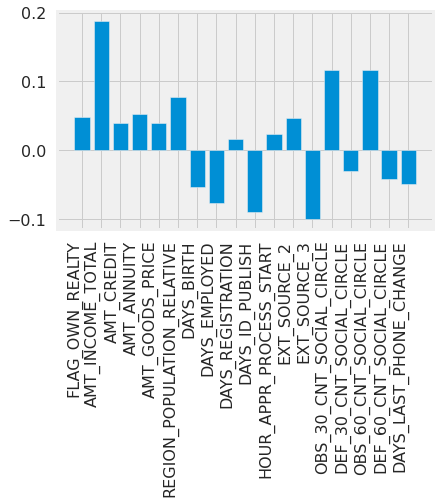

In [ ]:
weight_df
weight_df.mean(axis=0)
plt.bar(x,weight_df.mean(axis=0))
plt.xticks(x, ["FLAG_OWN_REALTY","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE", 
                      "DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH", "HOUR_APPR_PROCESS_START", "EXT_SOURCE_2", "EXT_SOURCE_3", 
                      "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE"])
plt.xticks(rotation=90, ha='right')

 - With 50% reduction in dimensions, we manged to extract 80% of the information.


# Clustering

In [ ]:
categ_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REGION_RATING_CLIENT',
 'WEEKDAY_APPR_PROCESS_START',
 'REGION_RATING_CLIENT_W_CITY']

## Preprocessing

Preprocessing for clustering: 
<br>&nbsp;&nbsp;&nbsp;&nbsp;0) Drop NANs
<br>&nbsp;&nbsp;&nbsp;&nbsp;1) Drop categorical columns that are created by binning numerical data;
<br>&nbsp;&nbsp;&nbsp;&nbsp;2) Convert categorical columns: 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) One-hot Encoding for non-binary and non-ordinal data;
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b) 0 and 1 for binary categorical data;
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c) Integers for ordinal categorical data;

In [ ]:
# Drop NANs
df_dropna = df_copy_cluster.dropna()
df_dropna.shape

(179896, 53)

### Drop NANs

In [ ]:
# Drop Categorical columns created by binning
drop_columns = ['SK_ID_CURR', 'AMT_INCOME_RANGE', 'AGE_GROUP', 'EMPLOYMENT_YEAR']
df_cluster = df_dropna.drop(columns=drop_columns)

### One-Hot Encoding

In [ ]:
# One-hot Encoding
# Weekday is in this category since it is cyclical; A simple ordinal numerical conversion would not be a good representation.
onehot_col = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
def onehot(col_name, dataframe):
  temp_df = pd.get_dummies(dataframe[col_name], prefix=col_name)
  dataframe = pd.concat([dataframe.drop(columns=[col_name]),temp_df], axis=1)
  return dataframe
for col_name in onehot_col:
  df_cluster = onehot(col_name, df_cluster)


### Other Categorical Data

In [ ]:
# Define Dictionary
cat_to_num_binary_dictionary = {'NAME_CONTRACT_TYPE': {'Cash loans': 0, 'Revolving loans': 1},
                                'CODE_GENDER': {'M': 0, 'F': 1, 'XNA': 2},
                                'FLAG_OWN_CAR': {'N': 0, 'Y': 1},
                                'FLAG_OWN_REALTY': {'N': 0, 'Y': 1},
                                'NAME_EDUCATION_TYPE': {'Academic degree': 4, 'Higher education': 3, 'Incomplete higher': 2, 'Lower secondary': 0, 'Secondary / secondary special': 1}}

In [ ]:
df_cluster = df_cluster.replace(cat_to_num_binary_dictionary)

In [ ]:
df_cluster.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179896 entries, 0 to 307510
Data columns (total 153 columns):
 #   Column                                    Dtype   
---  ------                                    -----   
 0   TARGET                                    int64   
 1   NAME_CONTRACT_TYPE                        int64   
 2   CODE_GENDER                               int64   
 3   FLAG_OWN_CAR                              int64   
 4   FLAG_OWN_REALTY                           int64   
 5   CNT_CHILDREN                              int64   
 6   AMT_INCOME_TOTAL                          float64 
 7   AMT_CREDIT                                float64 
 8   AMT_ANNUITY                               float64 
 9   AMT_GOODS_PRICE                           float64 
 10  NAME_EDUCATION_TYPE                       int64   
 11  REGION_POPULATION_RELATIVE                float64 
 12  DAYS_BIRTH                                int64   
 13  DAYS_EMPLOYED                             i

## K Nearest Neighbours

In [ ]:
#knn
from sklearn.neighbors import NearestNeighbors

# Number of neighbors to use
k = 10000
# Parameter for the Minkowski metric: 2 -> euclidean_distance
p = 2

knn = NearestNeighbors(n_neighbors=k, p=p)
#knn.fit(df_cluster.drop(columns=['TARGET']), df_cluster['TARGET'])
knn.fit(df_cluster)



NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10000, p=2,
                 radius=1.0)

In [ ]:
# IMPORTANT: This code fills the cloud RAM and will induce a crash
# Do NOT run on cloud.
# distances, indices = knn.kneighbors(df_cluster)

In [ ]:
# np.max(distances)

## K-Means

In [ ]:
# K Means
from sklearn.cluster import KMeans

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(df_cluster)
kmeans.labels_

array([0, 0, 1, ..., 0, 2, 4], dtype=int32)

In [ ]:
#kmeans.cluster_centers_

In [ ]:
# Choose k

def inertia_plot(dataframe, title):
  ks = range(1,11)
  inertias = []
  for k1 in ks:
    kmeans = KMeans(n_clusters=k1, random_state=0).fit(dataframe)
    inertias.append(kmeans.inertia_)

  plt.plot(ks, inertias, '-o', color='black')
  plt.xlabel('number of clusters')
  plt.ylabel('inertia')
  plt.title(title)
  #plt.xticks(ks)
  plt.show()

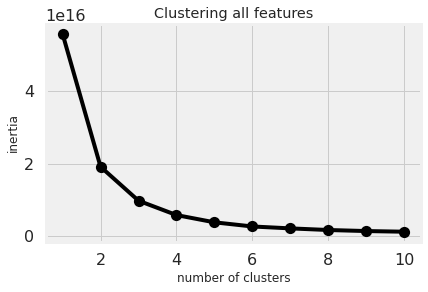

In [ ]:
inertia_plot(df_cluster, 'Clustering all features')

After k=3, the change in inertia becomes less significant. 

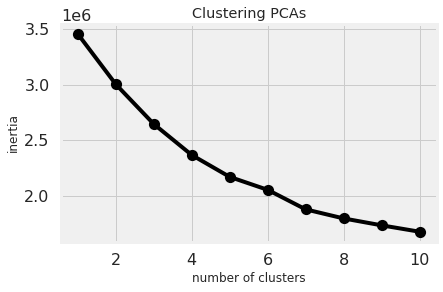

In [ ]:
# K-menas on PCAs

inertia_plot(principal_Df, 'Clustering PCAs')

With PCAs, increasing number of clusters yields steady decrease in innertia. <br>
After k=7, the change in inertia becomes less significant.

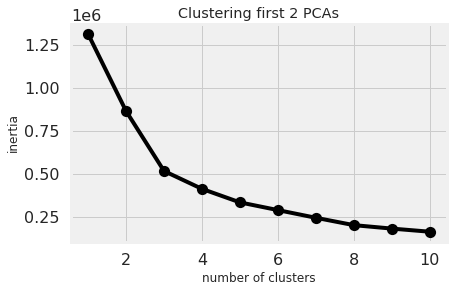

In [ ]:
# visualize on first 2 PCAs
pca_cluster_df = principal_Df[['v1','v2']].copy()
inertia_plot(pca_cluster_df, 'Clustering first 2 PCAs')

With first 2 PCAs, the inertia change becomes less significant after k=3.


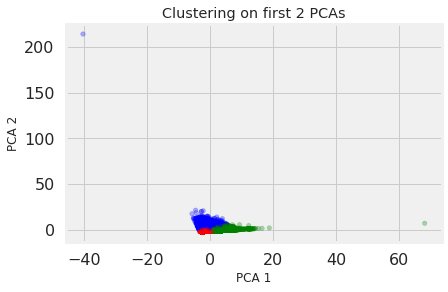

In [ ]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(pca_cluster_df)
labels = kmeans.labels_

color_dict = {0: 'red', 1: 'green', 2: 'blue'}
color_array = pd.Series(labels).map(color_dict)

plt.scatter(pca_cluster_df['v1'], pca_cluster_df['v2'], c = list(color_array), alpha=0.3, s=20)
plt.title('Clustering on first 2 PCAs')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

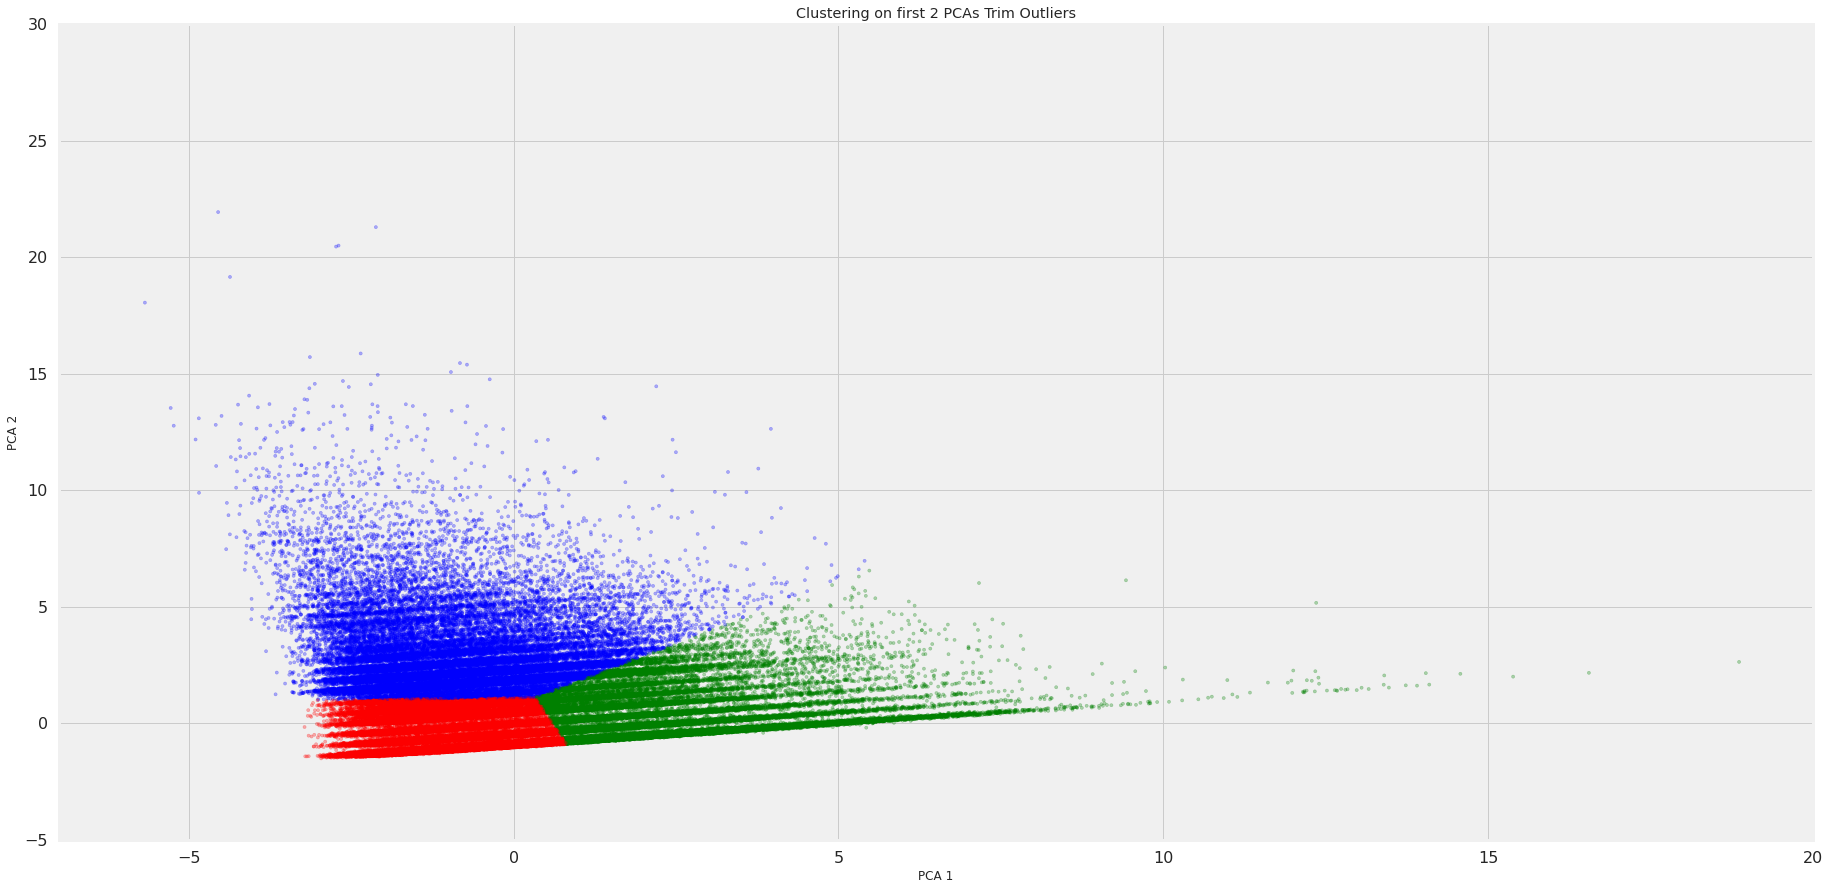

In [ ]:
fig = plt.figure(figsize=(28,15))
plt.scatter(pca_cluster_df['v1'], pca_cluster_df['v2'], c = list(color_array), alpha=0.3, s=10)
plt.xlim(-7,20)
plt.ylim(-5,30)
plt.title('Clustering on first 2 PCAs Trim Outliers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# COVID-19 Analysis

## HEAT MAPS

In [ ]:
time_df = df_copy[['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']]

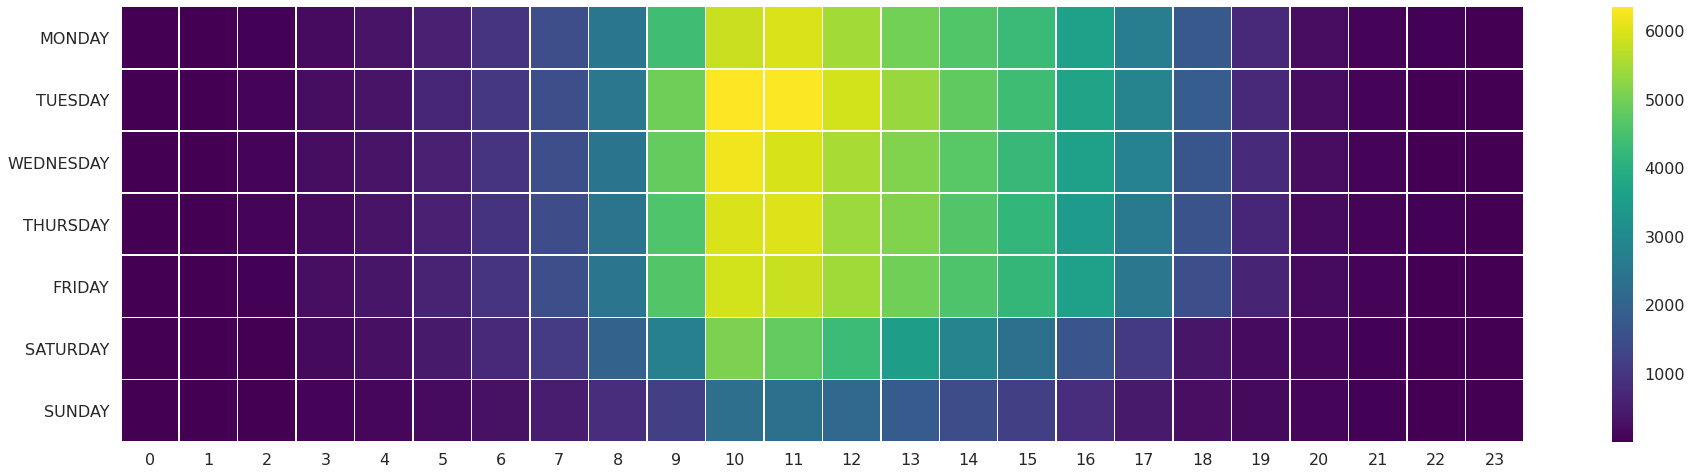

In [ ]:
day_dict = {'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3,
            'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6,'SUNDAY': '7'}

gp_time = time_df[['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']].groupby(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']).size()
time_mat = []

for key,val in day_dict.items():
    time_mat.append(gp_time[key].tolist())

final_mat = np.array(time_mat)

fig = plt.figure(figsize=(28,8))
ax = sns.heatmap(final_mat,
            yticklabels=day_dict.keys(),
            annot = False,
            cmap ="viridis",
            linewidth=0.5)
